# Feature Selection

In [42]:
import pandas as pd
import numpy as np
from IPython.display import display

data = pd.read_csv('data_processed/complete/enc_data.csv')
_data = data.copy()

pd.set_option('display.max_columns', None)

display(data.head())

SELECT_WRAPPED = True

,status,loan_id,account_id,loan_amount,loan_duration,loan_payments,account_district_id,disp_id,client_id,has_disponent,client_district_id,last_balance,mean_balance,min_balance,monthly_diff,code,region,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of municipalities with inhabitants > 2000,no. of cities,ratio of urban inhabitants,average salary,ratio enterpreneurs,unemploymant rate growth,crime rate growth,has_card,age_on_loan_request,age_on_loan_request_disc,account_frequency_issuance after transaction,account_frequency_monthly issuance,account_frequency_weekly issuance,gender_Female,gender_Male
0,-1,5314,1787,96396,12,8033,30,2166,2166,False,30,20100.0,12250.000000,1100.0,6700,30,7.0,15,13,10,10,0.818,9650,0.100,0.29,-0.001909,False,46,3.0,0.0,0.0,1.0,1.0,0.0
1,1,5316,1801,165960,36,4610,46,2181,2181,False,46,52208.9,52083.859459,700.0,14733,46,2.0,48,20,10,10,0.735,8369,0.117,0.52,-0.002094,False,25,1.0,0.0,1.0,0.0,0.0,1.0
2,1,6863,9188,127080,60,2118,45,11006,11314,False,45,20272.8,30060.954167,800.0,-6859,45,2.0,85,19,7,5,0.535,8390,0.132,0.61,0.000539,False,57,4.0,0.0,1.0,0.0,0.0,1.0
3,1,5325,1843,105804,36,2939,12,2235,2235,False,14,34292.7,41297.480000,1000.0,-11054,14,5.0,69,27,11,9,0.748,10045,0.135,0.29,-0.001739,False,53,4.0,0.0,1.0,0.0,1.0,0.0
4,1,7240,11013,274740,60,4579,1,13231,13539,False,63,41142.9,57188.211111,600.0,-30531,63,6.0,38,36,6,5,0.505,8288,0.110,0.73,-0.001179,False,15,0.0,0.0,0.0,1.0,0.0,1.0


In [43]:
def get_features(df):
    return df.drop('status', axis=1)
def get_target(df):
    return df.drop(df.columns.difference(['status']), axis=1)

### Remove unecessary features

In [44]:
no_ids = [c for c in data.columns if c[-3:] != '_id' and c != 'code']
data = data[no_ids]
# data.drop(['account_frequency', 'gender', 'card_type'], axis=1, inplace=True)

display(data.head())
display(data.info())

,status,loan_amount,loan_duration,loan_payments,has_disponent,last_balance,mean_balance,min_balance,monthly_diff,region,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of municipalities with inhabitants > 2000,no. of cities,ratio of urban inhabitants,average salary,ratio enterpreneurs,unemploymant rate growth,crime rate growth,has_card,age_on_loan_request,age_on_loan_request_disc,account_frequency_issuance after transaction,account_frequency_monthly issuance,account_frequency_weekly issuance,gender_Female,gender_Male
0,-1,96396,12,8033,False,20100.0,12250.000000,1100.0,6700,7.0,15,13,10,10,0.818,9650,0.100,0.29,-0.001909,False,46,3.0,0.0,0.0,1.0,1.0,0.0
1,1,165960,36,4610,False,52208.9,52083.859459,700.0,14733,2.0,48,20,10,10,0.735,8369,0.117,0.52,-0.002094,False,25,1.0,0.0,1.0,0.0,0.0,1.0
2,1,127080,60,2118,False,20272.8,30060.954167,800.0,-6859,2.0,85,19,7,5,0.535,8390,0.132,0.61,0.000539,False,57,4.0,0.0,1.0,0.0,0.0,1.0
3,1,105804,36,2939,False,34292.7,41297.480000,1000.0,-11054,5.0,69,27,11,9,0.748,10045,0.135,0.29,-0.001739,False,53,4.0,0.0,1.0,0.0,1.0,0.0
4,1,274740,60,4579,False,41142.9,57188.211111,600.0,-30531,6.0,38,36,6,5,0.505,8288,0.110,0.73,-0.001179,False,15,0.0,0.0,0.0,1.0,0.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 27 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   status                                           328 non-null    int64  
 1   loan_amount                                      328 non-null    int64  
 2   loan_duration                                    328 non-null    int64  
 3   loan_payments                                    328 non-null    int64  
 4   has_disponent                                    328 non-null    bool   
 5   last_balance                                     328 non-null    float64
 6   mean_balance                                     328 non-null    float64
 7   min_balance                                      328 non-null    float64
 8   monthly_diff                                     328 non-null    int64  
 9   region                          

None

## Feature Selection
### Wrapper Method
Split Data into subsets and train a model using this. Based on the output of the model, add or subtract features and train the model again.
#### 1. Forward Selection

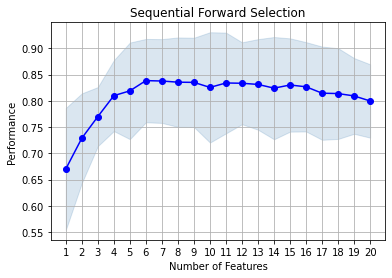

In [45]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

x = get_features(data)
y = data['status']

def forward_selection(features, target, k_features = 20):
    sfs = SFS(GradientBoostingClassifier(),
              k_features=k_features,
              forward=True,
              floating=False,
              cv = 5,
              scoring = 'roc_auc',
              n_jobs = -1)
    sfs = sfs.fit(features, target)
    fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
    plt.title('Sequential Forward Selection')
    plt.grid()
    plt.show()
    return pd.DataFrame.from_dict(sfs.get_metric_dict()).T

if SELECT_WRAPPED:
    forward_selection_result = forward_selection(x, y)
    forward_selection_result

#### 2. Backward Elimination

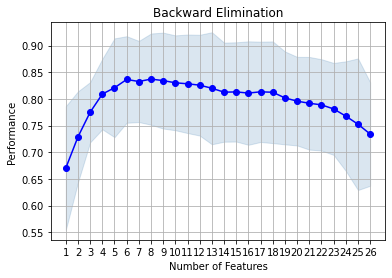

In [46]:
def backward_selection(features, target, k_features = 1):
    sbs = SFS(GradientBoostingClassifier(),
              k_features=k_features,
              forward=False,
              floating=False,
              scoring = 'roc_auc',
              cv = 5,
              n_jobs = -1)
    sbs = sbs.fit(features, target)
    fig1 = plot_sfs(sbs.get_metric_dict(), kind='std_dev')
    plt.title('Backward Elimination')
    plt.grid()
    plt.show()
    return pd.DataFrame.from_dict(sbs.get_metric_dict()).T

if SELECT_WRAPPED:
    backward_selection_result = backward_selection(x, y)
    backward_selection_result

#### 3. Bi-directional Elimination (Step-wise Selection)

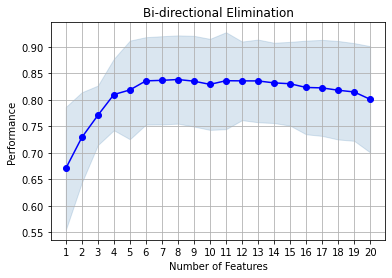

In [47]:
def bi_directional_elimination(features, target, k_features = (1,20)):
    sffs = SFS(GradientBoostingClassifier(),
              k_features=k_features,
              forward=True,
              floating=True,
              scoring = 'roc_auc',
              cv = 5,
              n_jobs = -1)
    sffs = sffs.fit(features, target)
    fig1 = plot_sfs(sffs.get_metric_dict(), kind='std_dev')
    plt.title('Bi-directional Elimination')
    plt.grid()
    plt.show()
    return pd.DataFrame.from_dict(sffs.get_metric_dict()).T

if SELECT_WRAPPED:
    bi_directional_elimination_result = bi_directional_elimination(x, y)
    bi_directional_elimination_result

### Overview of the methods
#### Comparison

In [48]:
if SELECT_WRAPPED:
    # Change 'avg_score' to float
    forward_selection_result['avg_score'] = forward_selection_result['avg_score'].astype(float)
    backward_selection_result['avg_score'] = backward_selection_result['avg_score'].astype(float)
    bi_directional_elimination_result['avg_score'] = bi_directional_elimination_result['avg_score'].astype(float)

    # Find the best result for each method
    a = forward_selection_result.iloc[forward_selection_result['avg_score'].idxmax()]
    b = backward_selection_result.iloc[backward_selection_result['avg_score'].idxmax()]
    c = bi_directional_elimination_result.iloc[bi_directional_elimination_result['avg_score'].idxmax()]

    c_df = pd.DataFrame({
        'method': ['forward selection', 'backward elimination', 'bi-directional'],
        'feature_names': [a['feature_names'], b['feature_names'], c['feature_names']],
        'n_features': [len(a['feature_names']), len(b['feature_names']), len(c['feature_names'])],
        'avg_score': [a['avg_score'], b['avg_score'], c['avg_score']]  
    })

    display(c_df)

,method,feature_names,n_features,avg_score
0,forward selection,"(loan_payments, has_disponent, mean_balance, m...",7,0.837606
1,backward elimination,"(loan_duration, loan_payments, has_disponent, ...",18,0.812417
2,bi-directional,"(loan_payments, has_disponent, mean_balance, m...",9,0.835006


#### Selection

In [49]:
if SELECT_WRAPPED:
    best_features_names = c_df.iloc[c_df['avg_score'].idxmax()]['feature_names']
    print('Best features: ', best_features_names)
    
    best_feature = []
    for feature_name in best_features_names:
        best_feature.append(data[feature_name])
    best_feature = pd.DataFrame(best_feature).T
    best_feature

Best features:  ('loan_payments', 'has_disponent', 'mean_balance', 'min_balance', 'monthly_diff', 'crime rate growth', 'has_card')


## Save

In [50]:
features = ['loan_amount', 'loan_payments', 'has_disponent', 'mean_balance', 'min_balance', 'monthly_diff', 'account_frequency_monthly issuance', 'account_frequency_weekly issuance']
if SELECT_WRAPPED:
    features = list(best_features_names)

features_selected = pd.concat([data[features], _data['status']], axis=1)
features_selected = pd.concat([_data['loan_id'], features_selected], axis=1)
features_selected.to_csv('data_processed/complete/data_selected.csv', index=False)